<a href="https://colab.research.google.com/github/tawaqalt/tawaqalt/blob/main/Skyward_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Introduction**

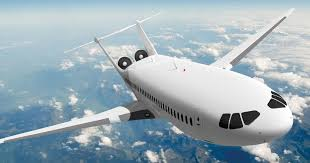

**Analysis of Customer Satisfaction for Skyward Airlines**


In today's competitive airline industry, understanding the factors that influence customer satisfaction is crucial for enhancing service quality and maintaining customer loyalty. This analysis explores the key drivers of customer satisfaction for Skyward Airlines, using a comprehensive dataset provided by the company. The primary objective is to identify the factors that most significantly affect passengers' experiences and to provide actionable insights that can help improve overall satisfaction.

Dataset Overview

The dataset, comprising numerous variables related to flight experiences, includes information on demographics, flight details, and service ratings. Key variables such as 'Ease of Online Booking', 'Inflight Wifi Service', 'Cleanliness', 'Food and Drink Service', and 'Inflight Entertainment' were thoroughly analyzed to determine their impact on customer satisfaction.



## **Importing Necessary Libraries**

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## **Uploading the skyward dataset**

In [ ]:
#Loading the dataset
df = pd.read_csv('/content/SKYWARDS_DATA_CW2.csv', encoding='latin1')

In [ ]:
#viewing the top 5 rows
df.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Flight Distance Rounded,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,460,4760,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,235,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,1142,4760,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,562,560,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,N,61,55 to 64,Business travel,Business,214,4760,...,5,3,3,4,4,3,3,3,0,0.0


## **Data Cleaning and Preparation**

Data Cleaning and Preparation
To ensure the reliability of the analysis, data cleaning and preparation steps were meticulously conducted:

Handling Missing Values: Missing values in the 'Arrival Delay in Minutes' column were imputed with the mean.

Addressing Outliers: Outliers were detected using the Z-score method and subsequently removed to maintain data integrity.

Encoding Categorical Variables: Non-numerical columns such as 'Satisfied', 'Gender', 'Type of Travel', and 'Class' were encoded using LabelEncoder.

In [ ]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Flight Distance Rounded            103904 non-null  int64  
 10  Destination                        103904 non-null  object 
 11  Continent                          1039

In [ ]:
#checking the shape of the dataset
df.shape

(103904, 28)

In [ ]:
df.columns

Index(['Ref', 'id', 'Gender', 'Satisfied', 'Age', 'Age Band', 'Type of Travel',
       'Class', 'Flight Distance', 'Flight Distance Rounded', 'Destination',
       'Continent', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
# Check for missing values
df.isnull().sum()

Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Flight Distance Rounded                0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service

There are 310 missing values in the Arrival Delay in Minutes column

In [ ]:
# Using Imputation Technique (filling missing values with the mean)
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

In [ ]:
#checking to see if the imputation work
df.isnull().sum()

Ref                                  0
id                                   0
Gender                               0
Satisfied                            0
Age                                  0
Age Band                             0
Type of Travel                       0
Class                                0
Flight Distance                      0
Flight Distance Rounded              0
Destination                          0
Continent                            0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness              

In [ ]:
#checking for duplicate values in the dataset
df.duplicated().sum()

0

Addressing inconsistencies in the dataset by checking for outliers

In [ ]:
from scipy import stats

def detect_outliers_zscore(df, columns, threshold=3):
    outliers = []
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        for value in df[col]:
            z_score = (value - mean) / std
            if abs(z_score) > threshold:
                outliers.append((col, value))
    return outliers

# Example usage:
outliers = detect_outliers_zscore(df, columns=['Departure/Arrival time convenient', 'Ease of Online booking', 'Flight Distance', 'Departure Delay in Minutes'])
print(outliers)

[('Flight Distance', 4243), ('Flight Distance', 4963), ('Flight Distance', 4983), ('Flight Distance', 4243), ('Flight Distance', 4243), ('Flight Distance', 4243), ('Flight Distance', 4963), ('Flight Distance', 4983), ('Flight Distance', 4817), ('Flight Distance', 4983), ('Flight Distance', 4243), ('Flight Distance', 4963), ('Flight Distance', 4243), ('Flight Distance', 4243), ('Flight Distance', 4983), ('Flight Distance', 4817), ('Flight Distance', 4502), ('Flight Distance', 4502), ('Flight Distance', 4502), ('Flight Distance', 4243), ('Flight Distance', 4963), ('Flight Distance', 4243), ('Flight Distance', 4502), ('Flight Distance', 4983), ('Flight Distance', 4502), ('Flight Distance', 4243), ('Flight Distance', 4963), ('Flight Distance', 4817), ('Flight Distance', 4983), ('Flight Distance', 4983), ('Flight Distance', 4243), ('Flight Distance', 4963), ('Flight Distance', 4502), ('Flight Distance', 4983), ('Flight Distance', 4243), ('Flight Distance', 4963), ('Flight Distance', 4243), 

In [ ]:
#removing the outliers
def remove_outliers(df, outliers):
    return df[~df.isin(outliers)]

# **Exploratory Data Analysis**

In [ ]:
# Creating a descriptive statistics for the dataset
df.describe()

,Ref,id,Age,Flight Distance,Flight Distance Rounded,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,4164.071066,2.522319,3.060248,2.756852,2.976825,1.951956,...,3.398666,3.358071,3.382247,3.350930,3.631708,3.304185,3.640331,3.286245,14.818390,15.181275
std,29994.645522,37463.812252,15.114964,997.147281,1346.755749,1.447848,1.525143,1.398993,1.277703,1.875950,...,1.365819,1.333104,1.288478,1.315715,1.181056,1.265501,1.175822,1.312373,38.313911,38.716567
min,0.000000,1.000000,7.000000,31.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,4760.000000,1.000000,2.000000,2.000000,2.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,4760.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4760.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5940.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Dropping unnecessary columns that might create ambiguities

In [ ]:
#dropping unnecessary columns
df = df.drop(columns=['Ref','id','Age Band', 'Destination', 'Continent', 'Flight Distance Rounded'])

Visualizing distributions in the dataset

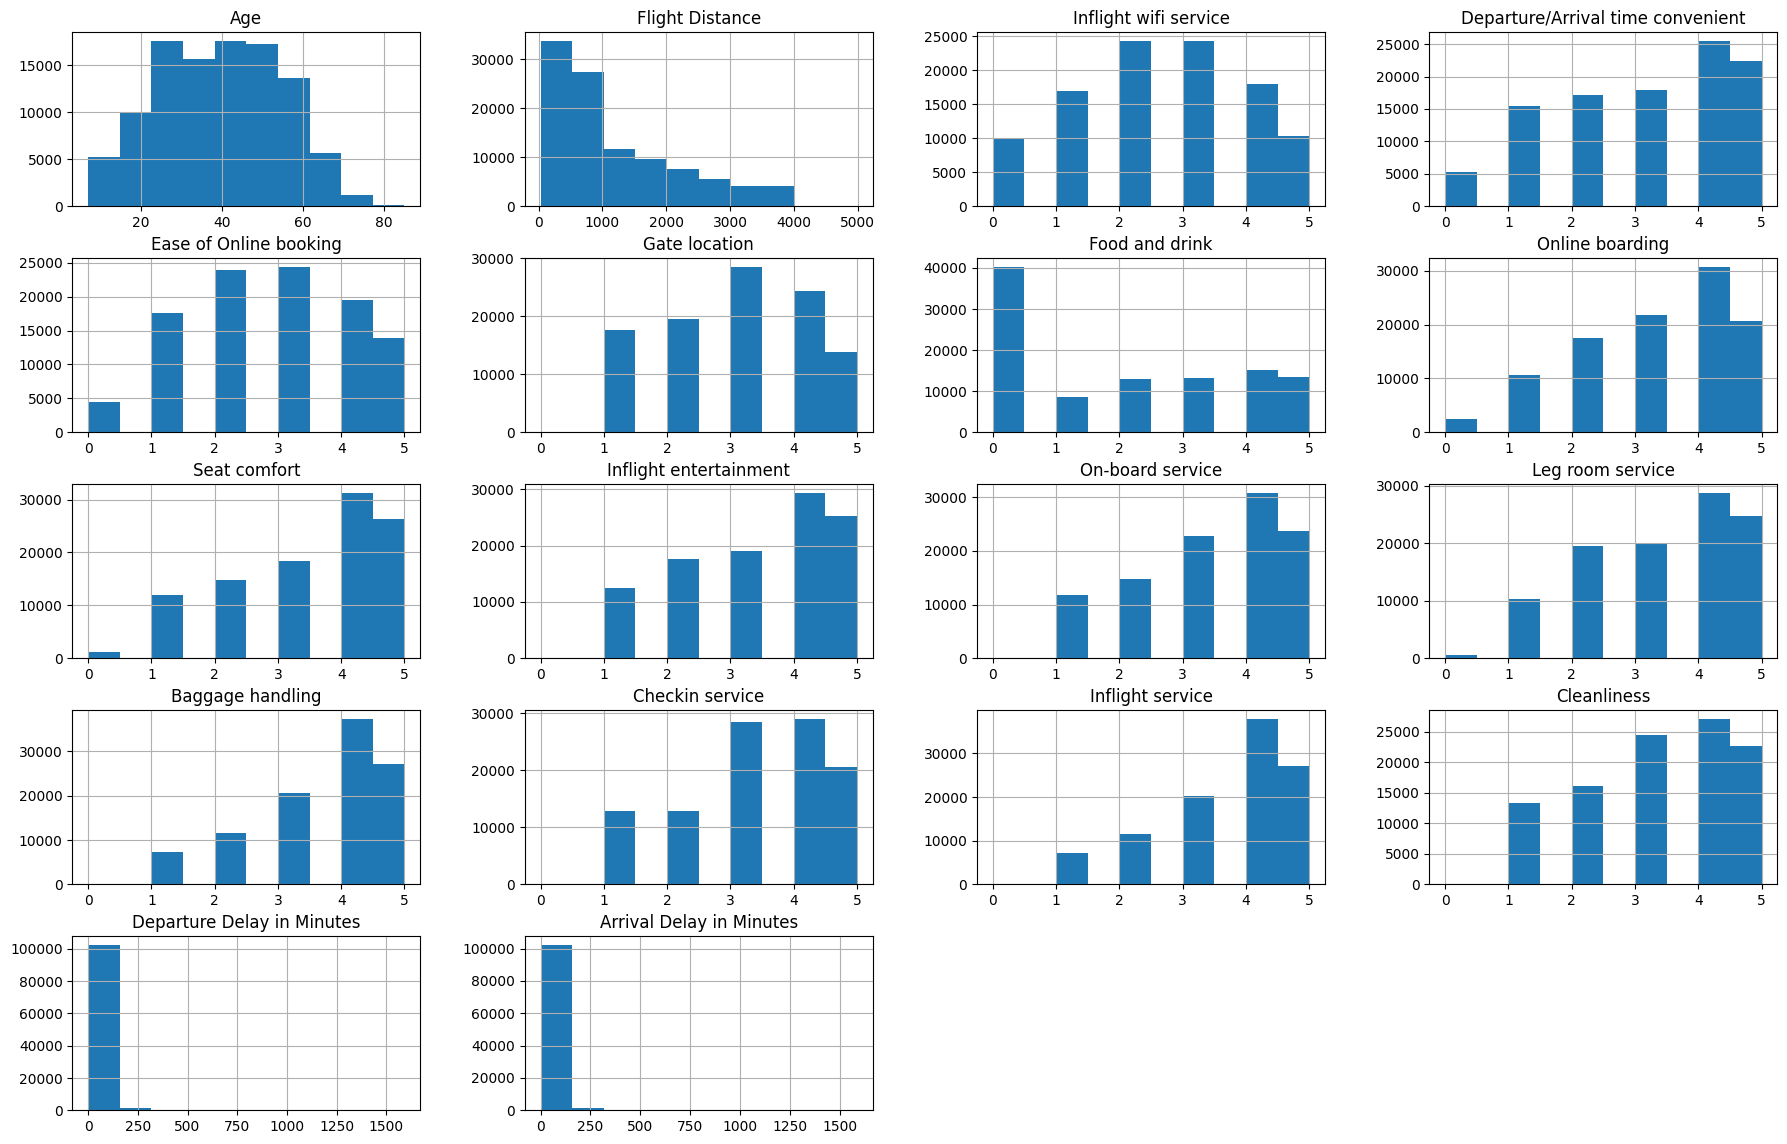

In [ ]:
# Histograms for numerical features
df.hist(figsize=(22, 14))
plt.show()

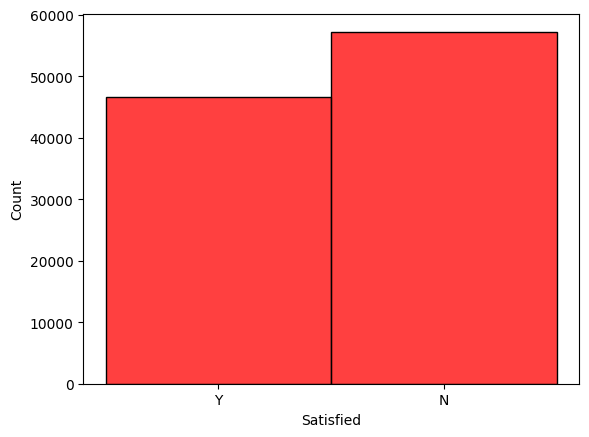

In [ ]:
#visualizing using a  Box plots:
sns.histplot(x='Satisfied', color='red', data=df)
plt.show()

the box plot shows that the passengers that were satisfied with the airline services were in the age range of 20-45 and those that were not satisfied were predominanlty in the age range of 35 and above.


Exploratory Data Analysis (EDA)
The EDA provided valuable insights into the distribution and relationships of the variables:

Passenger Satisfaction Trends: The analysis revealed that passengers aged 20-45 were generally more satisfied, whereas those aged 35 and above showed a higher tendency towards dissatisfaction.

Service Quality Impact: Features such as 'Ease of Online Booking', 'Inflight Wifi Service', and 'Cleanliness' demonstrated significant correlations with customer satisfaction, with lower ratings in these areas correlating with higher dissatisfaction.

**Encoding non-numerical columns or values**

In [ ]:
# Initializing LabelEncoder for each non-numerical value
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

# using a for loop to reiterate the encoding process
for col in ['Satisfied', 'Gender', 'Type of Travel', 'Class']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

## **Correlations**

In [ ]:
# Correlation matrix:
df.corr()

,Gender,Satisfied,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Gender,1.000000,0.014440,0.008928,0.006909,-0.012870,0.005828,0.011066,0.009135,0.006943,0.000332,...,-0.026083,0.006080,0.008124,0.031757,0.037344,0.010508,0.039371,0.006452,0.003002,0.000462
Satisfied,0.014440,1.000000,-0.540167,0.195764,0.033216,0.074395,0.126200,0.102967,-0.001498,-0.002505,...,0.003078,0.013510,-0.017261,-0.005616,0.010242,-0.019116,0.013999,0.012413,0.006521,0.008084
Age,0.008928,-0.540167,1.000000,-0.048524,-0.117370,0.099461,0.078229,0.038119,0.024836,-0.001338,...,0.094973,0.076423,0.057569,0.040564,-0.047550,0.035471,-0.049442,0.053598,-0.010084,-0.012061
Type of Travel,0.006909,0.195764,-0.048524,1.000000,0.487088,-0.267344,-0.000780,0.259745,-0.133512,-0.030717,...,-0.112048,-0.148174,-0.056542,-0.138791,-0.031316,0.016773,-0.022594,-0.079179,-0.005469,-0.005707
Class,-0.012870,0.033216,-0.117370,0.487088,1.000000,-0.427219,0.115833,0.089928,-0.094314,-0.004481,...,-0.174449,-0.178974,-0.207690,-0.197260,-0.163928,-0.157044,-0.158544,-0.125925,0.010190,0.014586
Flight Distance,0.005828,0.074395,0.099461,-0.267344,-0.427219,1.000000,0.066919,-0.020068,0.065685,0.004763,...,0.140989,0.128671,0.109443,0.133821,0.063090,0.072977,0.057466,0.093056,0.002209,-0.002366
Inflight wifi service,0.011066,0.126200,0.078229,-0.000780,0.115833,0.066919,1.000000,0.333087,0.569208,0.318589,...,0.158424,0.223420,0.071020,0.136668,0.036373,-0.009898,0.026274,0.147721,-0.014036,-0.014142
Departure/Arrival time convenient,0.009135,0.102967,0.038119,0.259745,0.089928,-0.020068,0.333087,1.000000,0.437012,0.444819,...,0.011529,-0.004717,0.069037,0.012605,0.072310,0.093482,0.073480,0.014445,-0.000252,-0.002081
Ease of Online booking,0.006943,-0.001498,0.024836,-0.133512,-0.094314,0.065685,0.569208,0.437012,1.000000,0.458715,...,0.026045,0.047169,0.038988,0.107747,0.038948,0.011236,0.035440,0.016327,-0.007709,-0.009272
Gate location,0.000332,-0.002505,-0.001338,-0.030717,-0.004481,0.004763,0.318589,0.444819,0.458715,1.000000,...,0.002901,0.003691,-0.028181,-0.005685,0.002539,-0.035228,0.001889,-0.003643,0.003652,0.003368


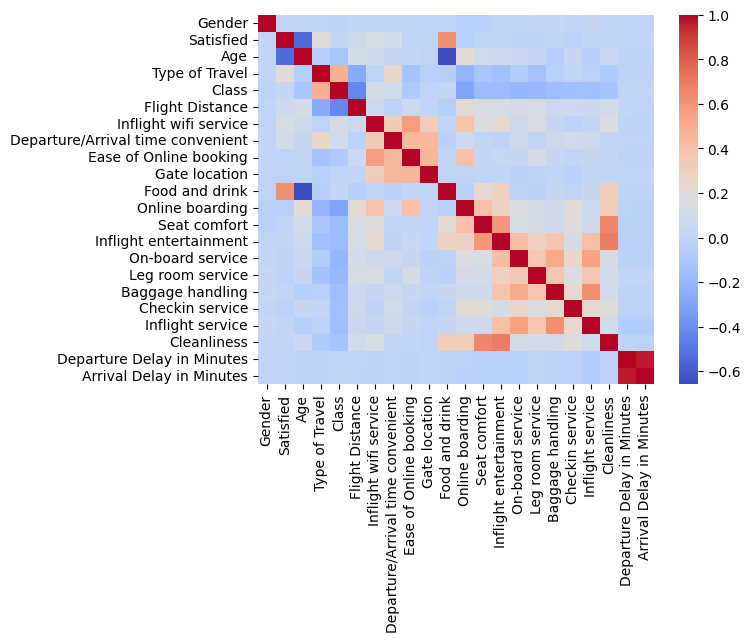

In [ ]:
# Visualizing correlation heatmap:
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

A positive correlation has been observed between various features, including Type of Travel, In-flight wifi service, In-flight entertainment, Class, and Flight Distance, according to the correlation distribution and heat map. Conversely, features like Age, Ease of Online booking, and seat comfort show a negative correlation.

## **Feature Engineering**

In [ ]:
features, target = df.drop('Satisfied', axis=1), df['Satisfied']

In [ ]:
features.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,13,1,2,460,3,4,3,1,5,...,5,5,4,3,4,4,5,5,25,18.0
1,1,25,0,0,235,0,2,3,3,1,...,1,1,1,5,3,1,4,1,1,6.0
2,0,26,0,0,1142,2,2,2,2,5,...,5,5,4,3,4,4,4,5,0,0.0
3,0,25,0,0,562,2,5,5,5,2,...,2,2,2,5,3,1,4,2,11,9.0
4,1,61,0,0,214,3,3,3,3,0,...,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
target.head()

0    1
1    0
2    1
3    1
4    0
Name: Satisfied, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#scaling the features
scaler = MinMaxScaler()
feature_scaled = scaler.fit_transform(features)

In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_scaled, target, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(83123, 21)

In [ ]:
X_test.shape

(20781, 21)

# **Implementing the First Model:Random Forest**

# Checking for the best Hyperparameter for Random Forest

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Creating a parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating a RandomizedSearchCV object
rs_model = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5, n_iter=10, scoring='accuracy', verbose=2)

# Fitting the model to the training data
rs_model.fit(feature_scaled, target)

# Getting the best parameters
best_params = rs_model.best_params_

# Printing the best parameters
print('Best parameters:', best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  32.5s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  17.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  15.8s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  17.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  16.5s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  17.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  18.4s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  17.8s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  16.6s
[CV] END max_depth=15, min_samp

In [28]:
# importing from scikit learn
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=15)

# Fitting the model to the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, n_estimators=300)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
# Predicting on the train and test set
ypred_tr= rf_model.predict(X_train)
accuracy_train = accuracy_score(y_train, ypred_tr)

# Predictions on test set
y_pred = rf_model.predict(X_test)
accuracy_pred = accuracy_score(y_test, y_pred)

#printing the accuracy
print("Accuracy score for Random forest :", accuracy_pred)

# Obtaining the Accuracy metrics

In [30]:
#checking for the accuracy metrics'
log_rf =log_loss(y_test, y_pred)
cm_rf= confusion_matrix(y_test, y_pred)
cl_report = classification_report(y_test, y_pred)

print('Random Forest')
print('the log loss of the model is:', log_rf)
print(f'\n', cm_rf)
print(f'\n', 'Classification Report')
print(f'\n', cl_report)

Random Forest
the log loss of the model is: 0.30699805831643046

 [[11479    95]
 [   82  9125]]

 Classification Report

               precision    recall  f1-score   support

           0       0.99      0.99      0.99     11574
           1       0.99      0.99      0.99      9207

    accuracy                           0.99     20781
   macro avg       0.99      0.99      0.99     20781
weighted avg       0.99      0.99      0.99     20781



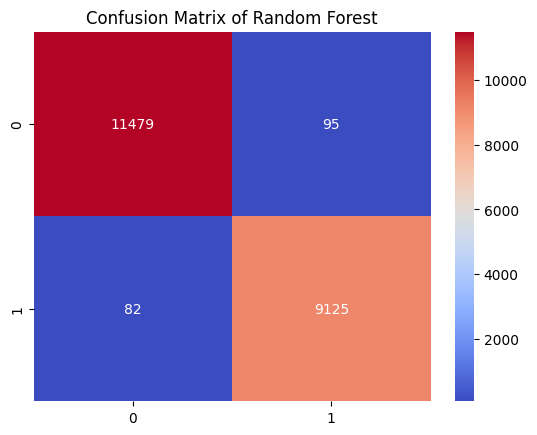

In [31]:
#confusion matrix of the Logistic Regression model
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix of Random Forest')
plt.show()

# Evalauting the Performance of the model using an ROC curve

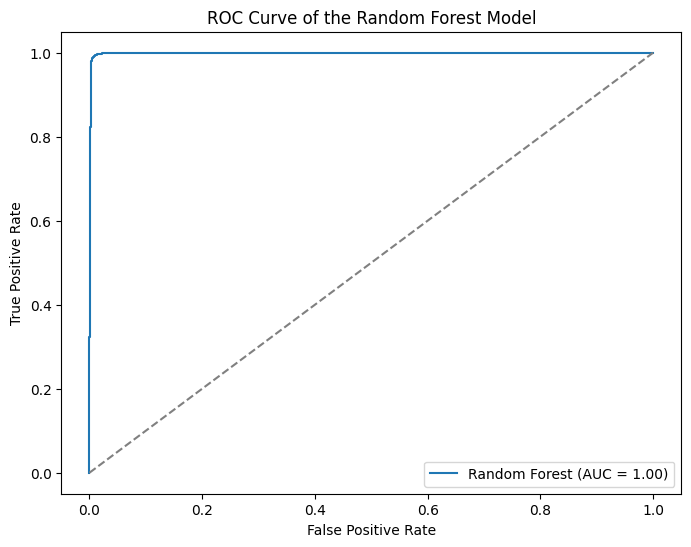

In [32]:
# Random Forest
from sklearn.metrics import roc_curve, auc
rf_probs = rf_model.predict_proba(X_test)[:, 1]  # Extract probabilities for the positive class
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# --- Plotting ---
plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Random Forest Model')
plt.legend()
plt.show()

# Applying Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score

num_folds = 5  # Setting the number of folds
results = cross_val_score(rf_model, feature_scaled, target, cv=num_folds, scoring='accuracy')

print("Cross-Validation Accuracy of the Random Forest Model is : {:.2f}% (+/- {:.2f}%)".format(results.mean() * 100, results.std() * 100))

Cross-Validation Accuracy of the Random Forest Model is : 99.15% (+/- 0.07%)


# **Implementing the Second Model: XGBoost model**

In [34]:
#importing the model
import xgboost as xgb
from xgboost import XGBClassifier

## **Implementing the model**

In [35]:
#Instantiating the XGBoost model
xg_model = XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=200, reg_alpha=1)

# Fitting the model to the training data
xg_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
# Predicting on the train and test set
ypred_tr= xg_model.predict(X_train)
accuracy_train = accuracy_score(y_train, ypred_tr)

# Predictions on test set
y_pred = xg_model.predict(X_test)
accuracy_pred_xg = accuracy_score(y_test, y_pred)

#printing the accuracy
print("Accuracy score :", accuracy_pred_xg)

Accuracy score : 0.9948510658774843


# Obtaining the Accuracy metrics

In [37]:
#obtaining the accuracy score
log_xg =log_loss(y_test, y_pred)
cm_xg= confusion_matrix(y_test, y_pred)
cl_report = classification_report(y_test, y_pred)

print('XGboost model')
print('the log loss of the model is:', log_xg)
print(f'\n', cm_xg)
print(f'\n', 'Classification Report')
print(f'\n', cl_report)

XGboost model
the log loss of the model is: 0.18558639683535633

 [[11506    68]
 [   39  9168]]

 Classification Report

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     11574
           1       0.99      1.00      0.99      9207

    accuracy                           0.99     20781
   macro avg       0.99      0.99      0.99     20781
weighted avg       0.99      0.99      0.99     20781



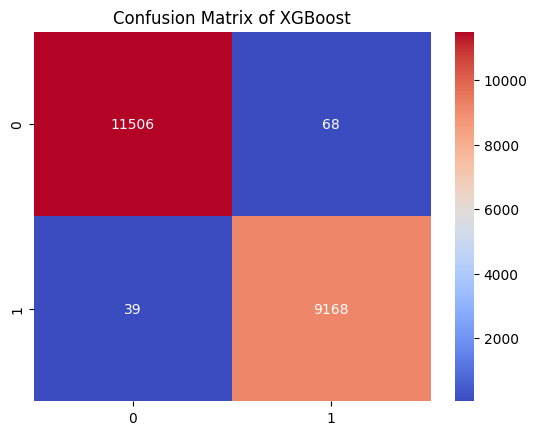

In [38]:
#confusion matrix of the XGBoost model
sns.heatmap(cm_xg, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix of XGBoost')
plt.show()

# Using an ROC curve to Evaluate the performance of the model

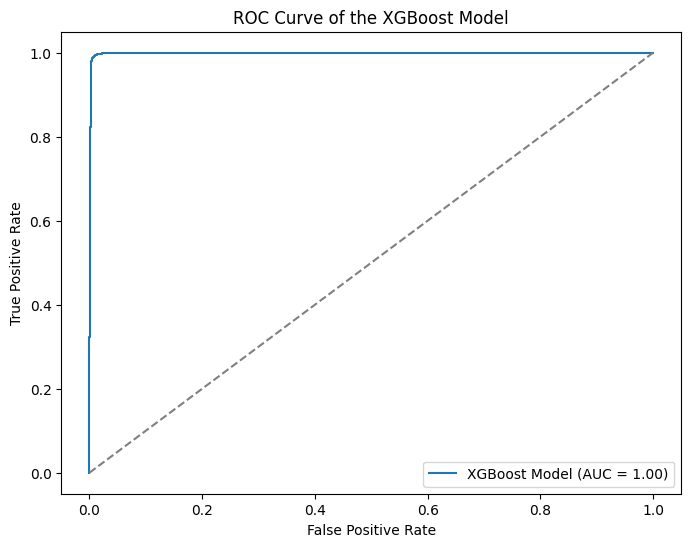

In [39]:
# Xgboost Model
from sklearn.metrics import roc_curve, auc
xg_probs = xg_model.predict_proba(X_test)[:, 1]  # Extract probabilities for the positive class
xg_fpr, xg_tpr, _ = roc_curve(y_test, rf_probs)
xg_auc = auc(xg_fpr, xg_tpr)

# --- Plotting the ROC curve
plt.figure(figsize=(8,6))
plt.plot(xg_fpr, xg_tpr, label='XGBoost Model (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the XGBoost Model')
plt.legend()
plt.show()

# XGBoost Model

In [40]:
from sklearn.model_selection import cross_val_score

num_folds = 5  # Setting the number of folds
results = cross_val_score(xg_model, feature_scaled, target, cv=num_folds, scoring='accuracy')

print("Cross-Validation Accuracy of the XGBoost model is: {:.2f}% (+/- {:.2f}%)".format(results.mean() * 100, results.std() * 100))

Cross-Validation Accuracy of the XGBoost model is: 99.42% (+/- 0.04%)


# Using XGBoost model to obtain the most influential features.

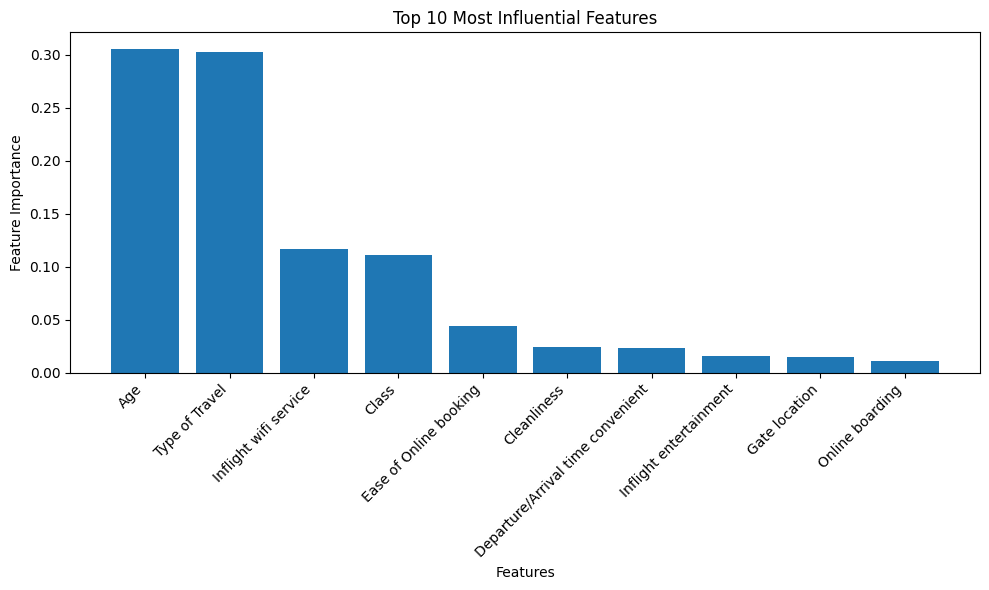

In [41]:
# Extracting Feature Importances
feature_importances = xg_model.feature_importances_
feature_names = features.columns

# Sorting features by importance (descending)
sorted_indices = np.argsort(feature_importances)[::-1]

# Creating a bar plot of the most important features
plt.figure(figsize=(10,6))
plt.bar(feature_names[sorted_indices[:10]], feature_importances[sorted_indices[:10]])
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 10 Most Influential Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Exploratory Data Analytics**



In [42]:
df['Satisified'] = df['Satisfied'].replace({0:'N', 1: 'Y'}, inplace = True)

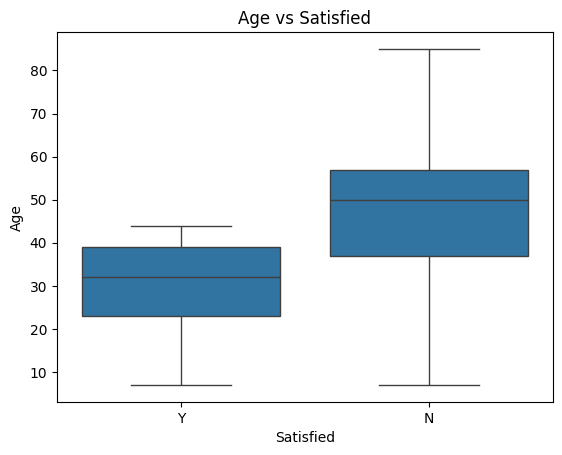

In [43]:
# visualizing using a boxplot
sns.boxplot(x='Satisfied', y='Age', data=df)
plt.title('Age vs Satisfied')
plt.show()

the box plot shows that majority of the passengers that were satisfied with the airline services were in the age range of 20-45 and a significant number that were not satisfied were predominanlty in the age range of 38 and 80

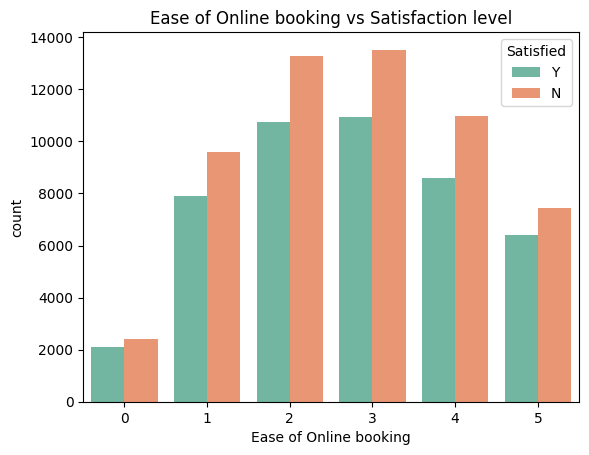

In [44]:
#visualizing with a countplot
sns.countplot(x='Ease of Online booking', hue='Satisfied', palette='Set2', data=df)
plt.title('Ease of Online booking vs Satisfaction level')
plt.show()

The countplot indicates that passenger satisfaction is influenced by the Ease of Online booking, with the majority of passengers rating it between 2 and 3, while others rated it below 1.

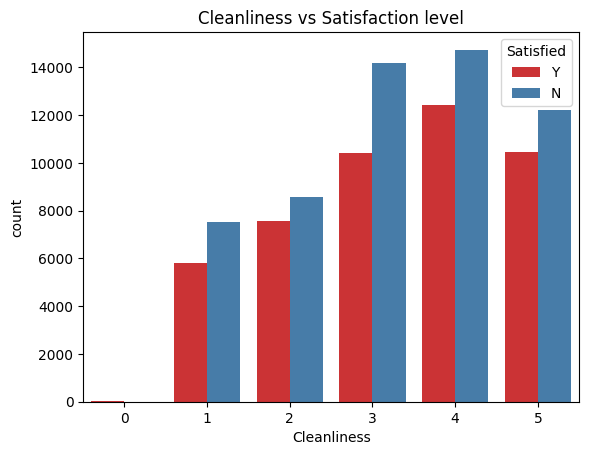

In [45]:
#visualizing with a countplot
sns.countplot(x='Cleanliness', hue='Satisfied', palette='Set1', data=df)
plt.title('Cleanliness vs Satisfaction level')
plt.show()

Passenger feedback, as revealed in the visualization, indicates that the Food and Drink service is a major weak point in the overall experience.  The overwhelming number of ratings below 1 suggests this aspect significantly diminishes satisfaction for passengers.

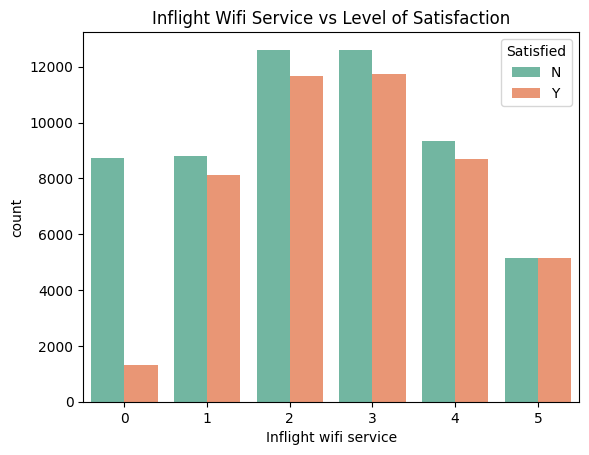

In [46]:
#converting the type of travel column to categorical variable
sns.countplot(x='Inflight wifi service', hue='Satisfied', palette='Set2', data=df)
plt.title('Inflight Wifi Service vs Level of Satisfaction')
plt.show()

Passenger feedback reveals that some individuals found the Wi-Fi service unsatisfactory, expressing this through ratings below one.

Conclusion: This analysis provides a comprehensive understanding of the factors influencing customer satisfaction at Skyward Airlines. By focusing on the identified key drivers(as revealed by the feature importance), the airline can implement targeted strategies to enhance the passenger experience and maintain competitive advantage in the industry.